### **YOLOv5 訓練程式碼：**

1. **首先，確保你已經安裝 YOLOv5**：
   如果還沒有安裝，可以使用以下命令來克隆 YOLOv5 的 GitHub 儲存庫並安裝所需依賴。

   ```bash
   git clone https://github.com/ultralytics/yolov5
   cd yolov5
   pip install -r requirements.txt
   ```

2. **撰寫 YOLOv5 訓練程式碼**：
   撰寫一個簡單的 Python 腳本來啟動訓練，或者直接在終端運行訓練命令。以下是如何使用 Python 程式碼來進行 YOLOv5 的訓練。

下載 YOLOv5 的預訓練權重（`.pt` 文件）。這些權重是 YOLOv5 官方提供的預訓練模型，用於資料集上進行微調或作為模型的起點。

### [下載 YOLOv5 預訓練權重](https://github.com/ultralytics/yolov5)

1. **YOLOv5 官方預訓練權重**：
   - 你可以從以下連結下載 YOLOv5 的不同變體的預訓練權重（`.pt` 文件）：
   - 這些預訓練的權重文件可以用來在你的資料集上進行微調，或者用來進行物件檢測任務。

2. **手動創建 `weights` 資料夾**：
   如果 `weights` 資料夾不存在，你可以手動創建一個並將下載的 `.pt` 文件放入其中。

3. **修改程式碼中的權重路徑**：
   確保你在訓練程式碼中使用正確的 `.pt` 文件路徑。

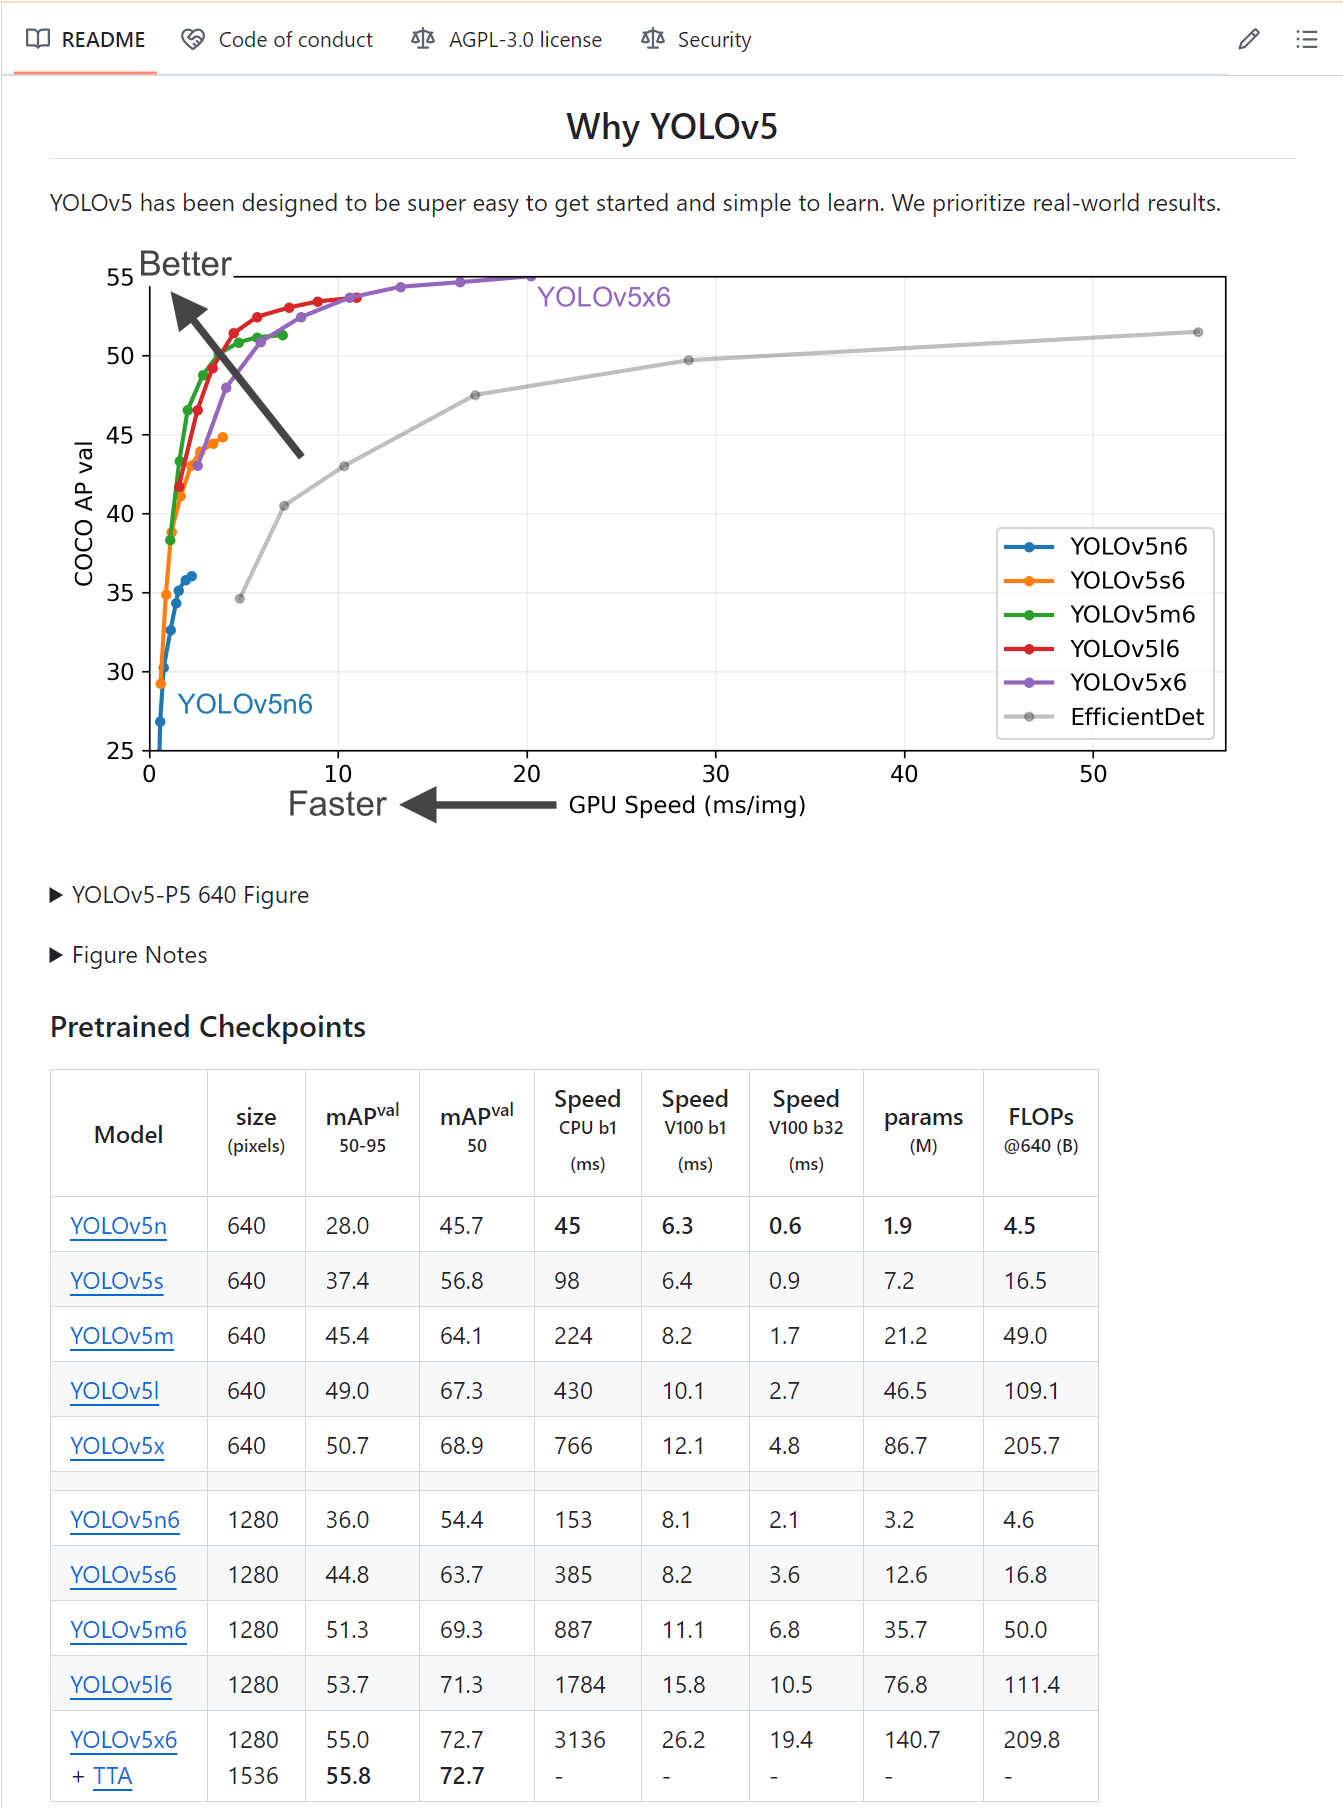

---

### 完整步驟：
1. **下載 YOLOv5 權重文件**：
   - 選擇合適的 YOLOv5 模型，並下載相應的 `.pt` 文件（例如 `yolov5s.pt`）。
   
2. **創建 `weights` 資料夾（如果尚未創建）**：
   - 在你的 YOLOv5 主目錄中創建一個名為 `weights` 的資料夾，並將 `.pt` 文件放入該資料夾中。

3. **修改程式碼，指定權重文件的路徑**：
   - 確保程式碼中的 `weights` 變數指向你下載的 `.pt` 文件的正確路徑。

### 如果你完成了這些步驟，接下來就可以開始建立Docker 映像。

---

接下來可以通過以下步驟來使用 Docker Desktop 建立 YOLOv5 的 Docker 映像。

### **步驟 1：準備 YOLOv5 專案和 Dockerfile**

1. 檢查 YOLOv5 資料夾內的 `docker` 資料夾是否存在。
2. YOLOv5 的 docker文件位置在 utils/docker ，裡面有三種，根據需求選擇，可使用預設的 Dockerfile，複製到 YOLOv5 根目錄。
3. 若選擇其他的 Dockerfile ，例如 Dockerfile-CPU 必須記得把 -CPU 文字刪除只保留 Dockerfile 文字，否則無法正常建立映像，因為系統只認定 Dockerfile。

### **步驟 2：在 Docker Desktop 中構建 Docker 映像**

1. **打開 Docker Desktop**，然後在左側菜單中選擇 `Builds`（構建）。

2. **構建 Docker 映像**：
   - 在 YOLOv5 專案根目錄中，你應該有一個 Dockerfile。要構建這個映像，你需要告訴 Docker Desktop 這個 Dockerfile 的位置。
   - 你可以打開終端進入 YOLOv5 資料夾，然後運行以下命令來構建 Docker 映像：

     ```bash
     docker build -t yolov5:latest .
     ```

   這條命令將會構建 YOLOv5 的 Docker 映像，並將其標記為 `yolov5:latest`。
   
### 如果你完成了這些步驟，接下來就可以開始建立 Docker 容器。

---

接下來你可以基於這個映像來建立 **容器**（`CONTAINERS`）。

### 1. **Docker 映像（IMAGES）與容器（CONTAINERS）**

- **映像（IMAGES）** 是一個靜態的、不可變的應用程式包，包含了所有運行應用所需的依賴、代碼和環境。你已經構建了 `yolov5-cpu:latest` 映像，它包含了 YOLOv5 和所有相關的依賴。
  
- **容器（CONTAINERS）** 是映像的實例化過程，容器運行映像中的應用程序。你可以基於一個映像創建多個容器，每個容器都是一個隔離的實例，擁有自己獨立的數據和運行環境。

#### **如何從映像創建容器？**
1. **你可以基於 `yolov5-cpu:latest` 映像創建多個容器**。例如，你可以運行以下命令來創建並運行容器：

```bash
docker run -it yolov5-cpu:latest
```

---

#### **補充:使用同一個映像創建多個容器**
基於一個映像創建多個容器。這是 Docker 的一個常見用途。容器之間互不干擾，因為它們是相互隔離的。

```bash
docker run -it --name yolov5-container1 yolov5-cpu:latest
docker run -it --name yolov5-container2 yolov5-cpu:latest
```

這樣，你會有兩個基於相同映像的不同容器。

---

### 2. **補充:Docker Compose 的用途**

當你的應用程式不止需要一個容器時，**Docker Compose** 非常有用。例如，當你有一個複雜的應用需要多個服務協同工作時，Docker Compose 可以幫助你定義和管理這些服務。

#### **什麼時候需要 Docker Compose？**

- **多容器應用**：如果你的應用需要不止一個容器，比如一個容器運行 YOLOv5，另一個容器運行數據庫，這時候就可以使用 Docker Compose 來協調它們。
  
- **容器之間的依賴性**：當一個容器依賴於另一個容器的啟動順序或網絡設置時，Docker Compose 可以幫助你定義這些依賴。

#### **Docker Compose 文件範例**：

Docker Compose 通過 `docker-compose.yml` 文件來定義多個容器的服務。這是 Docker Compose 文件的範例：

```yaml
version: '3'
services:
  yolov5:
    image: yolov5-cpu:latest
    container_name: yolov5_container
    volumes:
      - ./data:/usr/src/app/data
    ports:
      - "8080:8080"
    environment:
      - PYTHONUNBUFFERED=1
  db:
    image: postgres:latest
    container_name: postgres_db
    environment:
      POSTGRES_USER: user
      POSTGRES_PASSWORD: password
      POSTGRES_DB: yolov5_db
    volumes:
      - ./pgdata:/var/lib/postgresql/data
```

在這個範例中，`yolov5` 和 `db` 是兩個服務，`yolov5` 是你的 YOLOv5 應用，而 `db` 是 PostgreSQL 數據庫。你可以通過 Docker Compose 一次啟動這些服務：

```bash
docker-compose up
```

這樣就能同時啟動 YOLOv5 和數據庫。

---

### **總結**：

1. **映像與容器**：你已經構建好映像，可以基於這個映像創建多個容器，它們是彼此隔離的實例。
   
2. **Docker Compose**：當你需要協調多個容器來協同工作時，使用 Docker Compose 來方便地管理和配置這些容器。

---

### **"連結 Visual Studio Code"**（Attach Visual Studio Code）

**這樣，VSCode 就會自動連接到運行中的容器，並且你可以在容器環境中運行和編輯代碼。**

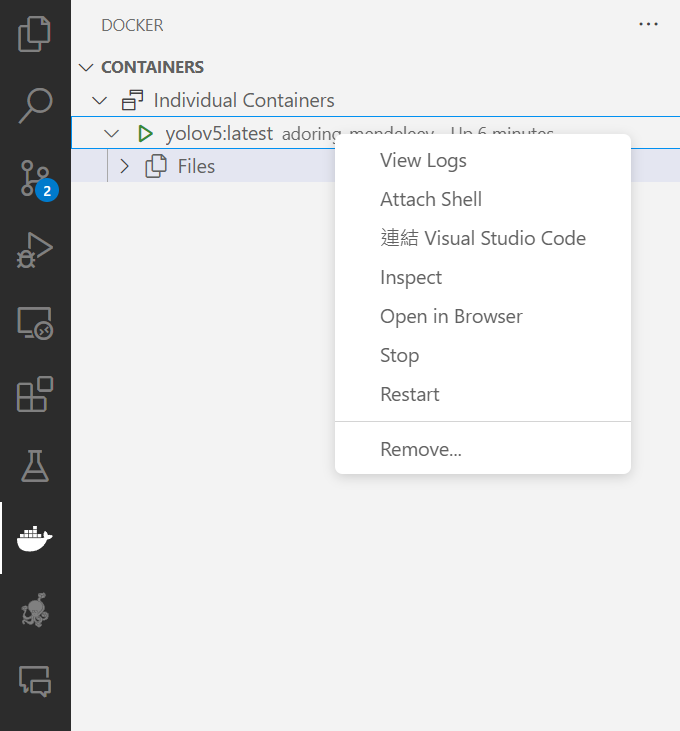

### 完成後：
- 當 VSCode 成功連接到容器後，你會看到 VSCode 的工作環境會切換到容器內部的文件系統。
- 此時，你可以檢查左下角的 Python 核心是否已切換到容器內的 Python 版本，而不是本地的環境。

---

##### **你現在已經成功進入 Docker 容器，然而在進行訓練模型時，出現了路徑錯誤。這是因為容器內的文件系統與你本地的文件系統是不同的，容器內無法直接訪問你本地機器上的路徑。**

##### **解決方法**：**使用 Docker Compose**

`docker-compose.yml` 文件應該放在你的專案根目錄，也就是 `yolov5-master` 目錄下，這樣可以方便管理你的 Docker 配置和容器啟動。

假設你的目錄結構如下：

```
D:/Learning_Python/30-Day_AI_Deep_Learning_Plan/yolov5-master
    ├── Dockerfile
    ├── requirements.txt
    ├── train.py
    ├── weights
    ├── data.yaml
    ├── docker-compose.yml  # 這個就是你要放置的地方
    └── ...
```

### **docker-compose.yml 文件範例**：

```yaml
version: '3.8'

services:
  yolov5:
    image: yolov5:latest  # 這是你在Dockerfile中構建的映像名稱
    build: .
    volumes:
      # 將本地路徑添加到容器路徑裡。左邊是你的本地路徑，右邊是容器中的路徑。
      - "D:/Learning_Python/30-Day_AI_Deep_Learning_Plan/yolov5-master:/usr/src/app" # yolov5-master 掛載到容器的根目錄
      - "D:/Learning_Python/30-Day_AI_Deep_Learning_Plan/第3週：物件檢測與 YOLO/Day17:/usr/src/app/Day17"  # Day17 掛載到單獨的目錄
    tty: true  # 保持容器運行
```

### **步驟：**

1. **建立 `docker-compose.yml` 文件**：
   - 在 `yolov5-master` 目錄下新建一個名為 `docker-compose.yml` 的文件。
   
2. **配置 `docker-compose.yml`**：
   - 根據你的需要，編寫如上所示的 `docker-compose.yml` 文件，特別是 `volumes` 部分，確保你的本地路徑和容器內路徑正確。

3. **運行 Docker Compose**：

   必須在 `yolov5-master` 目錄下
   
   
   
   運行以下命令來啟動服務：

   ```bash
   docker-compose up
   ```

   **這個命令會自動構建映像並啟動容器，換句話說，使用docker-compose的話，原本剛剛使用Dockerfile建立的映像步驟就可以省略了，而且也省略建立容器了。**

   你也可以通過 `docker-compose up -d` 在後台運行容器。

4. **檢查運行情況**：
   
   你可以用以下命令來檢查運行狀況：

   ```bash
   docker-compose ps
   ```

### **其他注意事項**：
- **`build: .`** 這一行指的是從當前目錄中的 `Dockerfile` 構建映像。
- **`volumes`** 部分是你掛載本地路徑到容器內的配置。
- **`command`** 部分是指定運行的命令。

這樣，你的所有配置都在一個 `docker-compose.yml` 文件中，未來運行只需一個命令即可啟動整個 YOLOv5 訓練環境。

---
### 如果你完成了這些步驟，接下來就可以開始訓練。

**使用 Docker Compose**

`docker-compose.yml` 文件應該放在你的專案根目錄，也就是 `yolov5-master` 目錄下，這樣可以方便管理你的 Docker 配置和容器啟動。

假設你的目錄結構如下：

```
D:/Learning_Python/30-Day_AI_Deep_Learning_Plan/yolov5-master
    ├── Dockerfile
    ├── requirements.txt
    ├── train.py
    ├── weights
    ├── data.yaml
    ├── docker-compose.yml  # 這個就是你要放置的地方
    └── ...
```

### **docker-compose.yml 文件範例**：

```yaml
version: '3.8'

services:
  yolov5:
    image: yolov5:latest  # 這是你在Dockerfile中構建的映像名稱
    build: .
    volumes:
      - "D:/Learning_Python/30-Day_AI_Deep_Learning_Plan/yolov5-master:/usr/src/app" # 將本地路徑添加到容器路徑裡。左邊是你的本地路徑，右邊是容器中的路徑。
    tty: true  # 保持容器運行
```

### **步驟：**

1. **建立 `docker-compose.yml` 文件**：
   - 在 `yolov5-master` 目錄下新建一個名為 `docker-compose.yml` 的文件。
   
2. **配置 `docker-compose.yml`**：
   - 根據你的需要，編寫如上所示的 `docker-compose.yml` 文件，特別是 `volumes` 部分，確保你的本地路徑和容器內路徑正確。

3. **運行 Docker Compose**：

   在 `yolov5-master` 目錄下，運行以下命令來啟動服務：
   
   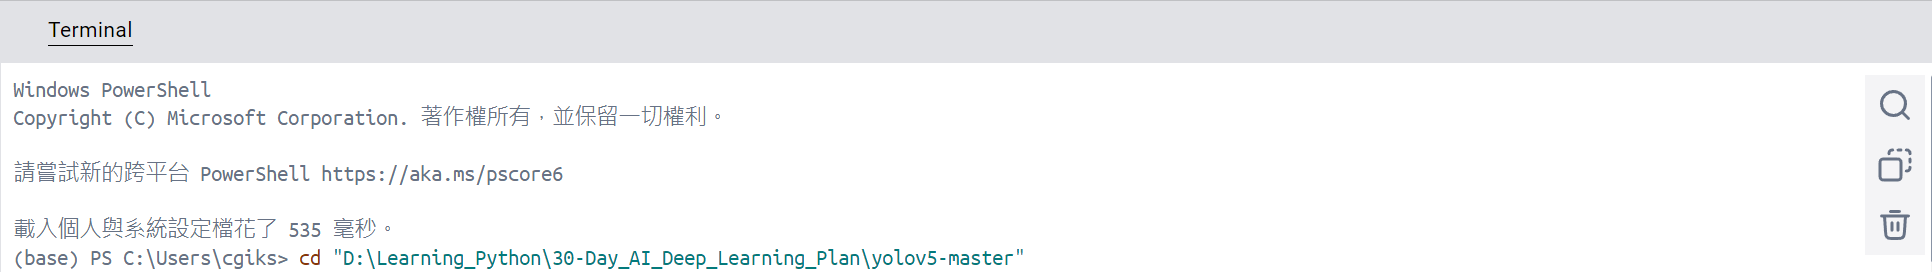

   ```bash
   docker-compose up
   ```

   這個命令會自動構建映像並啟動容器。你可以通過 `docker-compose up -d` 在後台運行容器。

4. **檢查運行情況**：
   
   你可以用以下命令來檢查運行狀況：

   ```bash
   docker-compose ps
   ```

### **其他注意事項**：
- **`build: .`** 這一行指的是從當前目錄中的 `Dockerfile` 構建映像。
- **`volumes`** 部分是你掛載本地路徑到容器內的配置。
- **`command`** 部分是指定運行的命令。

這樣，你的所有配置都在一個 `docker-compose.yml` 文件中，未來運行只需一個命令即可啟動整個 YOLOv5 訓練環境。

---
### 如果你完成了這些步驟，接下來就可以開始訓練。

### 別忘了更改 data.yaml

因為你的容器內使用的是 Linux 文件系統，所有文件路徑應該是基於掛載後的容器路徑而不是本地的 Windows 路徑。

### 更改 `data.yaml` 文件路徑：
因為你將本地的 `Day17` 目錄掛載到了 `/usr/src/app/Day17`，所以需要將 `data.yaml` 中的路徑更改為容器內的路徑。

**修正後的 `data.yaml`：**

```yaml
train: /usr/src/app/Day17/images/train  # 訓練集圖片的路徑
val: /usr/src/app/Day17/images/val      # 驗證集圖片的路徑

nc: 2  # 類別的數量
names: ['Male', 'Female']  # 類別名稱，0 對應 Male，1 對應 Female
```

---

In [ ]:
import os
from pathlib import Path

# 設定 YOLOv5 的工作目錄
yolov5_dir = Path("/usr/src/app")

# 切換到 YOLOv5 目錄
os.chdir(yolov5_dir)

# 設定訓練參數
img_size = 640  # 圖片大小
batch_size = 8  # 批次大小
epochs = 50  # epoch 次數
data_yaml = "/usr/src/app/Day17/data.yaml"  # data.yaml 文件路徑
weights = "/usr/src/app/weights/yolov5s.pt"  # 預訓練權重路徑

# 執行 YOLOv5 訓練
os.system(f"python3 train.py --img {img_size} --batch {batch_size} --epochs {epochs} --data {data_yaml} --weights {weights}")

### **參數說明**：
- **`--img 640`**：指定輸入圖片的大小（例如 640x640 像素）。
- **`--batch 16`**：每個訓練批次的大小，根據 GPU 記憶體來選擇合適的數量。
- **`--epochs 50`**：訓練的迭代次數（epoch），可以根據需要設置。
- **`--data`**：指定 `data.yaml` 文件的路徑，描述數據集。
- **`--weights`**：選擇預訓練的 YOLOv5 權重文件，可以使用 `yolov5s.pt`、`yolov5m.pt` 等來進行微調。

### **訓練過程中會顯示**：
- 每個 epoch 的損失函數（Loss）、準確度（mAP）、訓練時間等。
- 訓練過程中，YOLOv5 會自動在 `runs/train/exp` 資料夾中保存最好的模型。

### **檢查點**：
1. **檢查 GPU**：確保你正在使用 GPU 進行訓練，這會大大加快 YOLOv5 的訓練速度。可以通過 `torch.cuda.is_available()` 來檢查是否有 GPU 可以使用。
2. **調整超參數**：如果 GPU 記憶體不足，可以減少 `--batch` 大小或降低圖片的大小（例如 `--img 512`）。
3. **觀察訓練日誌**：YOLOv5 會在終端打印訓練日誌，你可以觀察損失值的變化以及模型的準確度。

### 訓練完成後的步驟：
- 訓練完成後，最好的模型會被保存在 `runs/train/exp/weights/best.pt`，你可以用這個模型進行推理或進行進一步的微調。

---